<a href="https://colab.research.google.com/github/BHARGAVIGHEGDE/Machine_learning_projects/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
#importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import  train_test_split
from sklearn.linear_model  import LinearRegression
from sklearn import metrics





In [26]:
 #importing the csv files
house=pd.read_csv('/content/Housing.csv')


In [27]:
house.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [30]:
house.replace({"mainroad":{'yes':1,'no':0}},inplace=True)
house.replace({"guestroom":{'yes':1,'no':0}},inplace=True)
house.replace({"basement":{'yes':1,'no':0}},inplace=True)
house.replace({"hotwaterheating":{'yes':1,'no':0}},inplace=True)
house.replace({"airconditioning":{'yes':1,'no':0}},inplace=True)
house.replace({"prefarea":{'yes':1,'no':0}},inplace=True)
house.replace({"furnishingstatus":{'furnished':1,'unfurnished':0,"semi-furnished":2}},inplace=True)







house.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


In [31]:
house.shape

(545, 13)

In [32]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [33]:
house.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.089908
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.858130
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [34]:
house.groupby('price').mean()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,,,,,,,,,,,,
1750000,3460.0,2.666667,1.0,1.333333,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.333333
1767150,2400.0,3.000000,1.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2.000000
1820000,3000.0,2.000000,1.0,1.000000,1.000000,0.0,1.0,0.0,0.0,2.0,0.0,0.000000
1855000,2990.0,2.000000,1.0,1.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.000000
1890000,2674.5,2.500000,1.0,1.500000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
10850000,7500.0,3.000000,3.0,1.000000,1.000000,0.0,1.0,0.0,1.0,2.0,1.0,2.000000
11410000,7420.0,4.000000,1.0,2.000000,1.000000,1.0,1.0,0.0,1.0,2.0,0.0,1.000000
12215000,7500.0,4.000000,2.0,2.000000,1.000000,0.0,1.0,0.0,1.0,3.0,1.0,1.000000


In [35]:
house['price'].value_counts()

3500000     17
4200000     17
4900000     12
3150000      9
5600000      9
            ..
6580000      1
4319000      1
4375000      1
4382000      1
13300000     1
Name: price, Length: 219, dtype: int64

In [36]:
#splitting  and target
x=house.drop(columns='price',axis=1)
y=house['price']

In [37]:
house.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [38]:
#corelation between data
corelation=house.corr()

<Axes: >

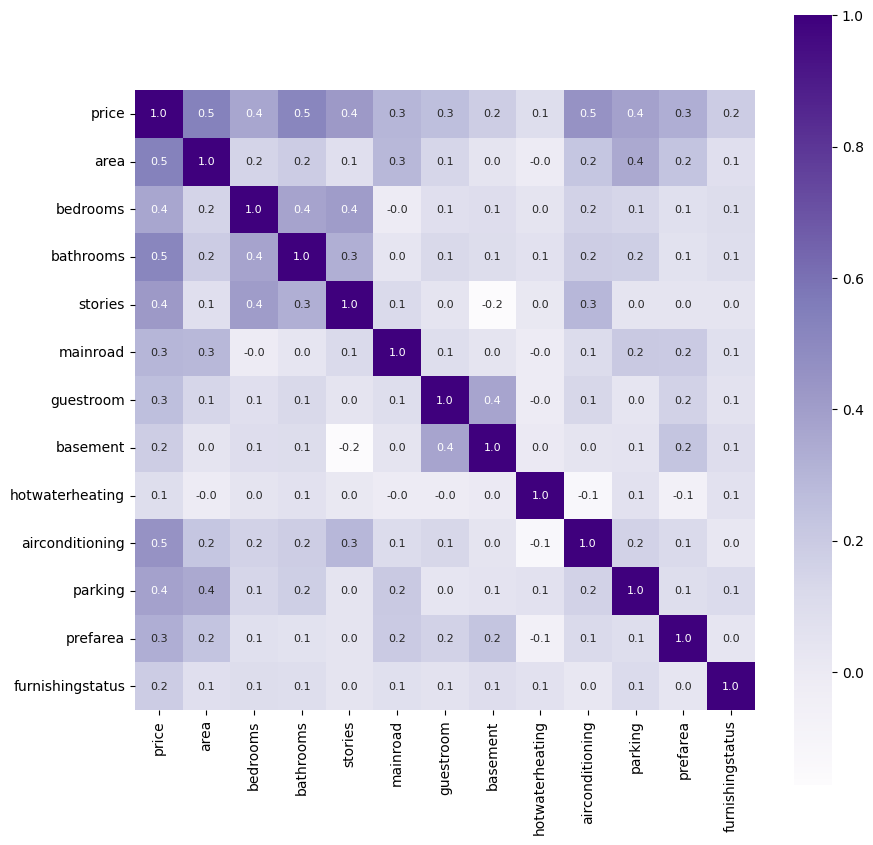

In [39]:
#constructing a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corelation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Purples')

In [40]:
print(x)

     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    8960         4          4        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1         0          0         0   
544  3850         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                  0              

In [41]:
print(y)

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64


In [42]:
 #splitting the data into training data and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [43]:
print(x_train.shape,x_test.shape)

(436, 12) (109, 12)


In [44]:
print(y_train.shape,y_test.shape)

(436,) (109,)


In [47]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [49]:
#predicting the training data
train_predict=model.predict(x_train)
print(train_predict)

[3968176.122631   4136978.88227733 3357015.64428592 3414459.69914166
 3170708.55816468 5752293.85222782 2917855.03463217 4942757.41058953
 6769298.49099124 4504111.47292145 3443810.0774692  2569842.42973433
 5894079.74885667 5478442.85636191 6081495.78542381 4868056.92884972
 5667517.237085   4121460.7446897  7519236.28534375 4210892.67742646
 5490320.74792733 2574392.57420419 5782410.39603183 4238332.94528091
 4375220.69060965 5038578.87056664 7751383.32801281 6289475.12666309
 4001403.96576887 3289405.14375377 4086059.6597286  3989459.95655528
 3580302.25526948 3797391.76605102 4437745.06255427 3353011.55381292
 3755942.12957879 4558113.42484201 2615107.51923707 8063966.46126944
 4796194.68039986 7784111.23438378 7999225.55603235 7397844.97884667
 5320757.84625154 3509100.84678383 3306266.97836644 3263402.07143332
 4009220.92626297 3609830.87402384 4660738.92718423 3894270.02948694
 5031021.64864517 2793125.13349196 4235106.41174308 6255112.16342137
 6178313.66434564 3864768.97392952

In [56]:
#R square error
score1=metrics.r2_score(y_train,train_predict)
print("r is",score1)


r is 0.6877180295110533


In [54]:
#predicting for testing data
test_predict=model.predict(x_test)
print(test_predict)

[ 3405135.38718031  5023371.45921181  2246276.04670194  3324823.28621531
  6645349.10000972  4261768.6745887   3691614.01169414  3031808.29843278
  3649582.00201398  3180795.3482571   3739847.70468908  3072183.84271357
  3694791.41457003  5196984.26903362  4867095.34592872  7094349.80729282
  7086164.34253617  4879520.89984819  2919264.99127607  4627221.00528678
  5674090.68056806  4742278.77407665  4948598.04076026  6109996.5028739
  1988679.20138095  2271662.11630953  2685512.78198972  3984043.65603907
  4986305.54745323  3041689.69405685  4696368.11151311  3775307.46067567
  4106166.20375558  5057288.34396233  4264909.32735102  7157985.14198527
  2424479.66614336  5159959.09414983  5204332.76962032  2587817.51216526
  7298660.05176546  3296981.52155732  3737141.55390184  4239131.42711552
  2962098.80860504  3941002.04767774  3026807.43822297  3155717.50152297
  5068350.30782138  4850666.52949112 10214041.26226322  6018957.36894506
  2720757.07878783  2685512.78198972  4333699.309443

In [57]:
#R square error
score3=metrics.r2_score(y_test,test_predict)
print("r is",score3)


r is 0.6327856764807612


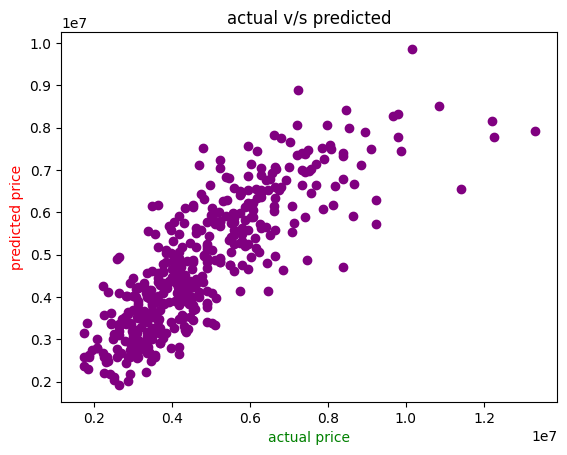

In [63]:
#plotting the graph for visualization
plt.scatter(y_train,train_predict,color="purple")
plt.xlabel("actual price",color="green")
plt.ylabel("predicted price",color="red")
plt.title("actual v/s predicted")
plt.show()